#### Read the dataset

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [3]:
df.shape

(136429, 14)

In [4]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=136429, step=1)

In [6]:
df.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [12]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking missing values

In [7]:
s = df.isna().sum()

In [8]:
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
s[s>0]

Series([], dtype: int64)

### Checking duplicates

In [10]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
136424    False
136425    False
136426    False
136427    False
136428    False
Length: 136429, dtype: bool

In [11]:
df.duplicated().sum()

0

#### Seperate X and Y

In [13]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [14]:
cat

['Product ID', 'Type']

In [15]:
con

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [16]:
df['Type'].value_counts()

Type
L    95354
M    32152
H     8923
Name: count, dtype: int64

<Axes: xlabel='Type'>

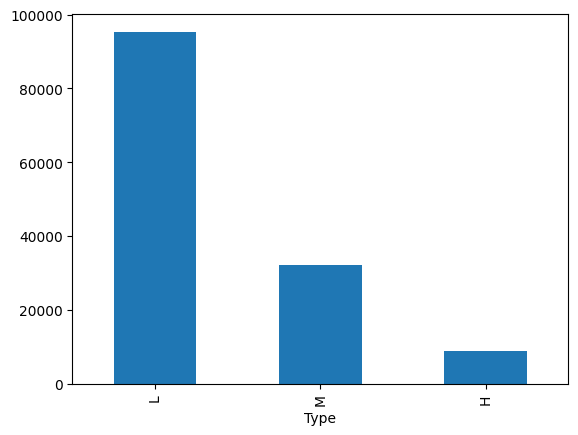

In [17]:
df['Type'].value_counts().plot(kind='bar')

In [19]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

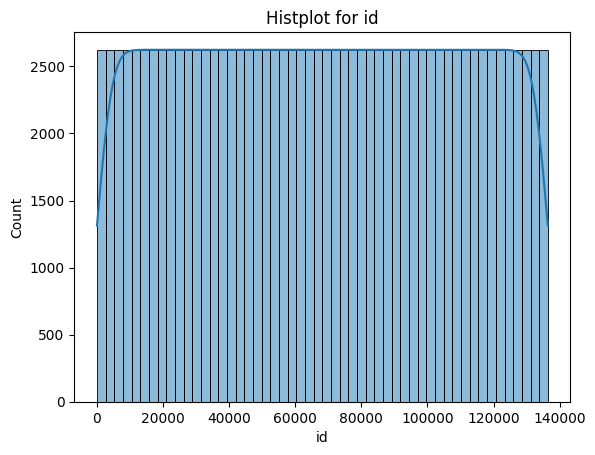

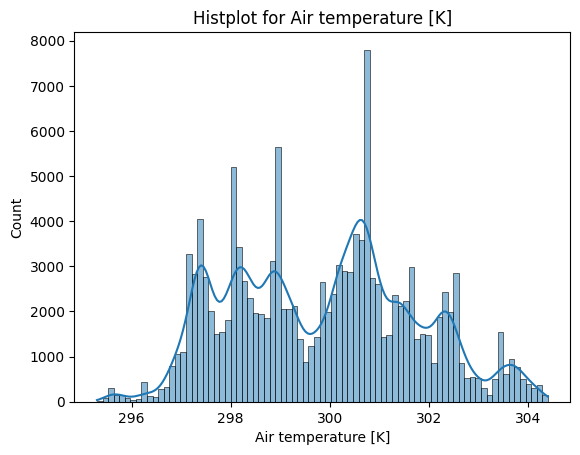

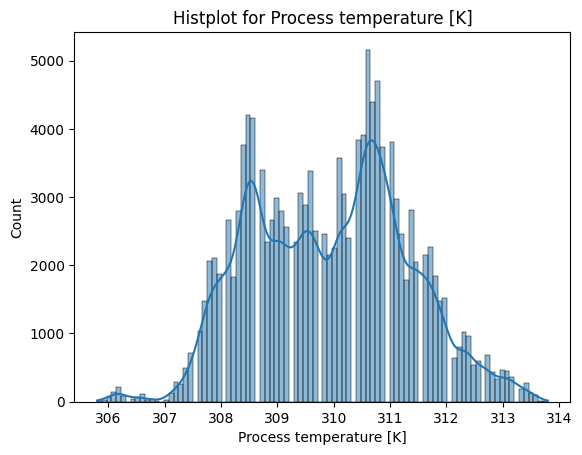

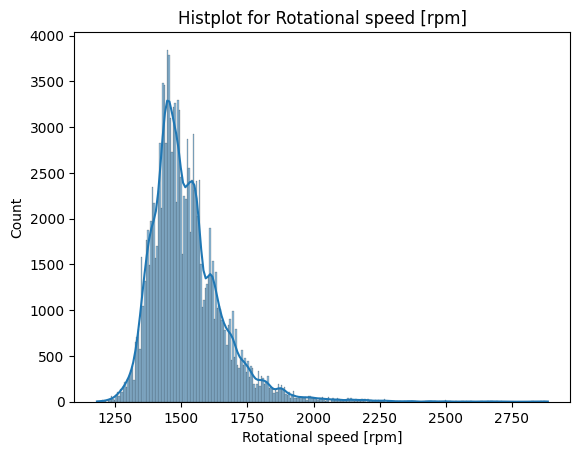

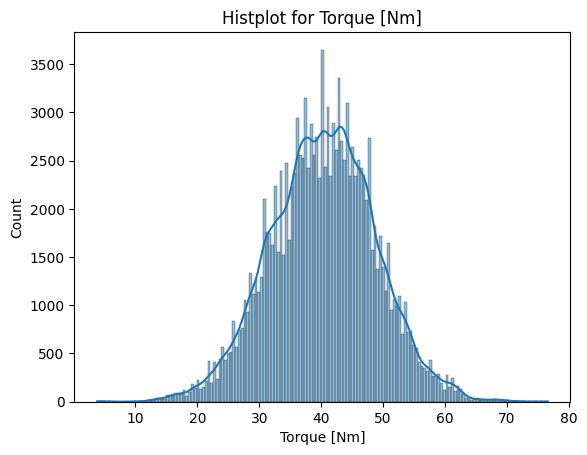

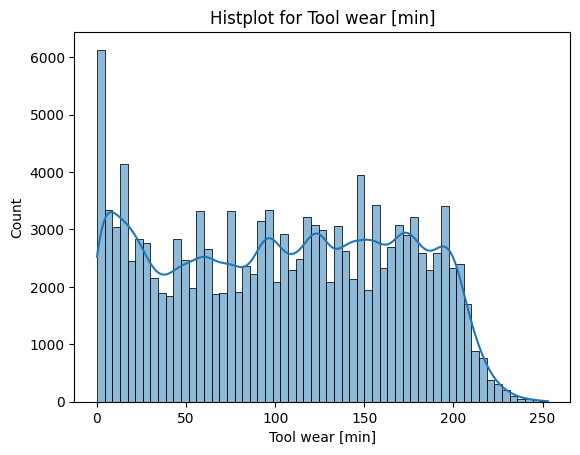

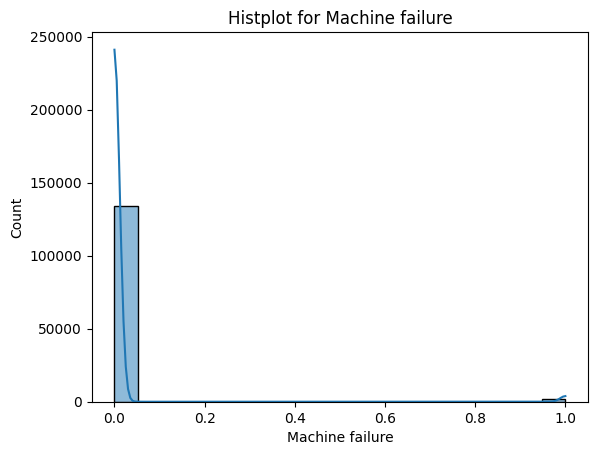

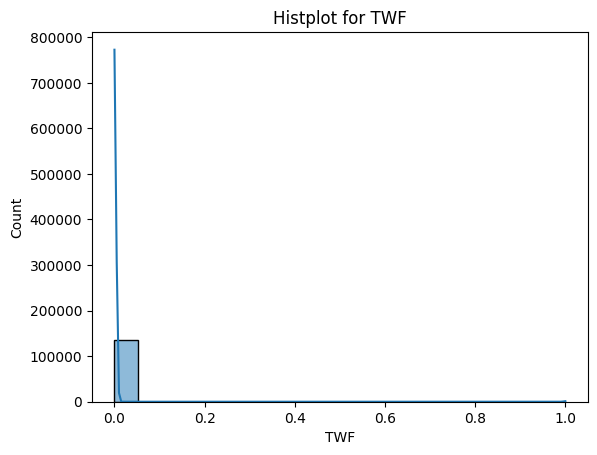

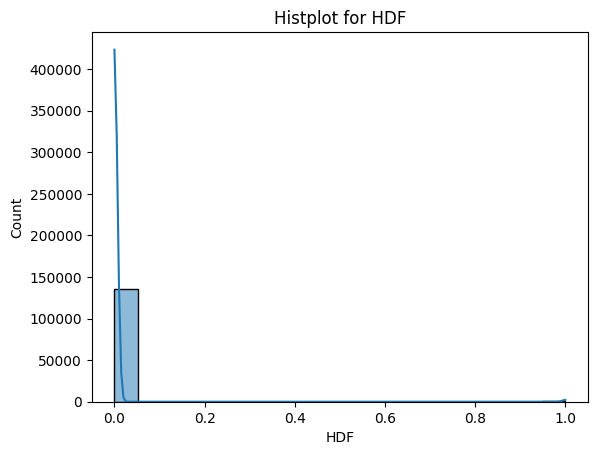

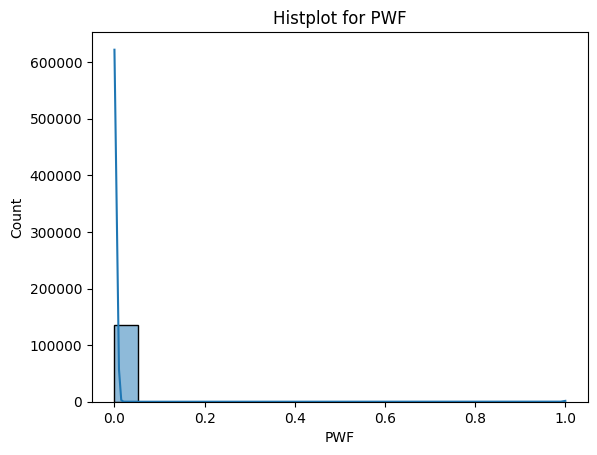

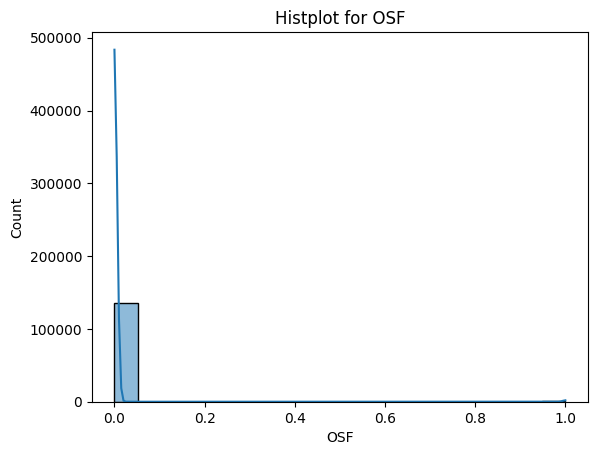

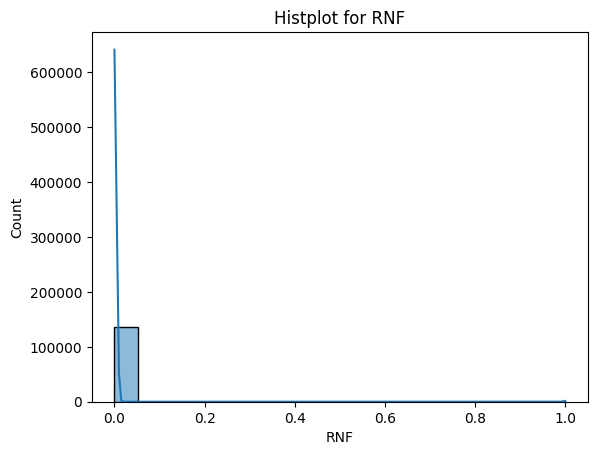

In [22]:
for i in con:
    plt.title(f"Histplot for {i}")
    sns.histplot(data=df,x=df[i],kde=True)
    plt.show()

### Bivariate  Analysis

In [23]:
con

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

<Axes: xlabel='Air temperature [K]', ylabel='Torque [Nm]'>

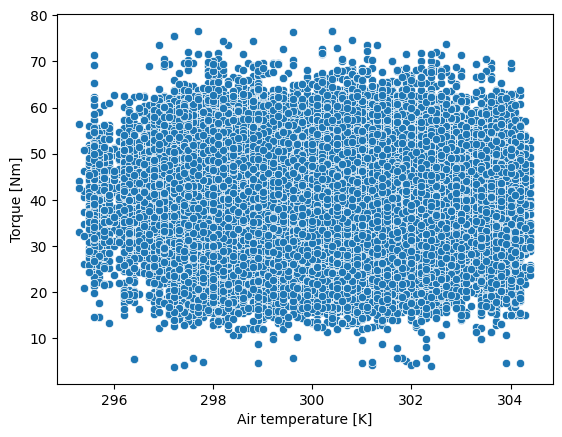

In [24]:
sns.scatterplot(data=df,x='Air temperature [K]',y='Torque [Nm]')

### Seperate X and Y in df

In [26]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [32]:
x=df.drop(columns=['id','Product ID','Machine failure'])
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [33]:
y = df[['Machine failure']]
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


### Seperate cat and con in x

In [36]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [37]:
cat

['Type']

In [38]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Create a preprocessing pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
# create a num_pipeline
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])

In [41]:
# create categorical Pipeline
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                         ('ordinal',OrdinalEncoder())])

In [44]:
pre=ColumnTransformer([('num',num_pipe,con),
                       ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [45]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


### Feature selection using mutual score info

In [46]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x_pre,y)
mi

e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.00568492, 0.00196775, 0.01937793, 0.01990151, 0.006835  ,
       0.00781017, 0.02476164, 0.01149294, 0.01990355, 0.00148625,
       0.01119078])

In [47]:
mi=pd.Series(mi)
mi.index=x_pre.columns
mi=mi.sort_values(ascending=False)
mi

num__HDF                        0.024762
num__OSF                        0.019904
num__Torque [Nm]                0.019902
num__Rotational speed [rpm]     0.019378
num__PWF                        0.011493
cat__Type                       0.011191
num__TWF                        0.007810
num__Tool wear [min]            0.006835
num__Air temperature [K]        0.005685
num__Process temperature [K]    0.001968
num__RNF                        0.001486
dtype: float64

<Axes: title={'center': 'mutual info score'}>

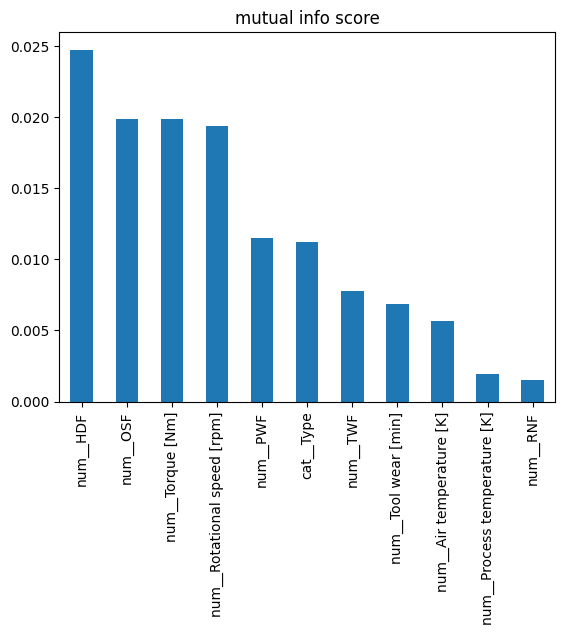

In [48]:
mi.plot(kind='bar',title = 'mutual info score')


In [49]:
from sklearn.feature_selection import SelectKBest
sel=SelectKBest(mutual_info_classif,k=8)
sel.fit(x_pre,y)
sel_cols=sel.get_feature_names_out()
sel_cols

e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'cat__Type'], dtype=object)

In [50]:
imp_cols =[]
for i in sel_cols:
    s=i.split('__')[1]
    imp_cols.append(s)

In [51]:
imp_cols

['Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'Type']

In [52]:
x_imp=x[imp_cols]
x_imp.head()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Type
0,1596,36.1,140,0,0,0,0,L
1,1759,29.1,200,0,0,0,0,M
2,1805,26.5,25,0,0,0,0,L
3,1524,44.3,197,0,0,0,0,L
4,1641,35.4,34,0,0,0,0,M


### Seperate cat and con in imp columns

In [53]:
cat_sel= list(x_imp.columns[x_imp.dtypes=='object'])
con_sel= list(x_imp.columns[x_imp.dtypes!='object'])

### Create a final preprocessing pipeline

In [54]:
num_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy="median")),
                          ('scaler',StandardScaler())])
cat_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy="most_frequent")),
                          ('ohe',OneHotEncoder(handle_unknown='ignore',sparse=False))])
pre1=ColumnTransformer([('num_sel',num_pipe1,con_sel),
                        ('cat_sel',cat_pipe1,cat_sel)]).set_output(transform="pandas"
                                                                   )

In [55]:
x_sel_pre=pre1.fit_transform(x_imp)
x_sel_pre.head()

e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,num_sel__Rotational speed [rpm],num_sel__Torque [Nm],num_sel__Tool wear [min],num_sel__TWF,num_sel__HDF,num_sel__PWF,num_sel__OSF,cat_sel__Type_H,cat_sel__Type_L,cat_sel__Type_M
0,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
1,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0
2,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
3,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
4,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0


### Splitting the dataset

In [58]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sel_pre,y,random_state=42,test_size=0.2)

In [59]:
x_train.shape

(109143, 10)

In [60]:
x_test.shape

(27286, 10)

### Model selection

In [63]:
# knn and svm used for small dataset where data is below 1000
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [64]:
dct = {'Logistic' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier()
}

In [66]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [67]:
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(x_train, y_train)
    # Predict results for train and test
    ypred_tr = model.predict(x_train)
    ypred_ts = model.predict(x_test)
    # Calculate f1 score in train and test
    f1_tr = f1_score(y_train, ypred_tr)
    f1_ts = f1_score(y_test, ypred_ts)
    # 5 - fold cross validation on training
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=============================================================\n')

e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Model name : Logistic

Train F1 : 0.8625
Train F1 Cross Validated : 0.9301
Test F1 : 0.8649


Model name : Decision Tree

Train F1 : 0.9879
Train F1 Cross Validated : 0.8758
Test F1 : 0.7486




e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Model name : Random Forest

Train F1 : 0.9879
Train F1 Cross Validated : 0.9242
Test F1 : 0.8604




e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Model name : Gradient Boost

Train F1 : 0.8733
Train F1 Cross Validated : 0.9282
Test F1 : 0.8619




In [68]:
result_dct={
    "Model_name":list(dct.keys()),
    'Train F1':tr,
    'Test F1':ts,
    'Train F1 CV':tr_cv
}

In [69]:
result_df=pd.DataFrame(result_dct)
result_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.862525,0.864865,0.930149
1,Decision Tree,0.987881,0.748603,0.875797
2,Random Forest,0.987945,0.860435,0.924184
3,Gradient Boost,0.873285,0.861893,0.928225


In [70]:
result_df.sort_values(by="Test F1",ascending=False)

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.862525,0.864865,0.930149
3,Gradient Boost,0.873285,0.861893,0.928225
2,Random Forest,0.987945,0.860435,0.924184
1,Decision Tree,0.987881,0.748603,0.875797


### Model creation using logistic regression

In [71]:
best_model = LogisticRegression()
best_model.fit(x_train, y_train)

e:\wakad 6 to 8pm\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [73]:
best_model.score(x_train, y_train)

0.9961884866642845

In [74]:
best_model.score(x_test, y_test)

0.9961518727552591

### Predict the results

In [75]:
y_pred_tr=best_model.predict(x_train)
y_pred_ts=best_model.predict(x_test)

In [76]:
# Training result
y_pred_tr[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [77]:
# Testing result
y_pred_ts[:5]

array([1, 0, 0, 0, 0], dtype=int64)

### Display confusion matrix

In [78]:
from sklearn.metrics import *

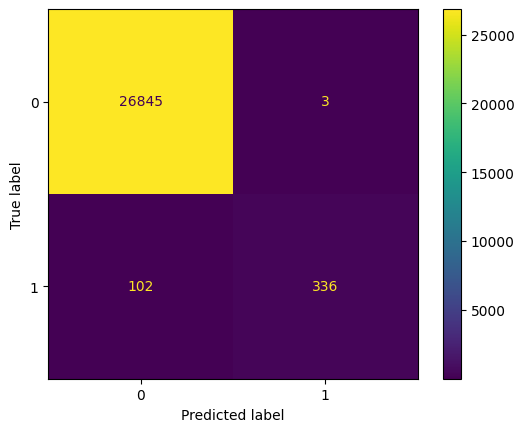

In [79]:
cm=confusion_matrix(y_test,y_pred_ts)
cmd=ConfusionMatrixDisplay(cm,display_labels=best_model.classes_)
cmd.plot()

### Display Classification report

In [80]:
print(classification_report(y_test,y_pred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



### Plot ROC Curve

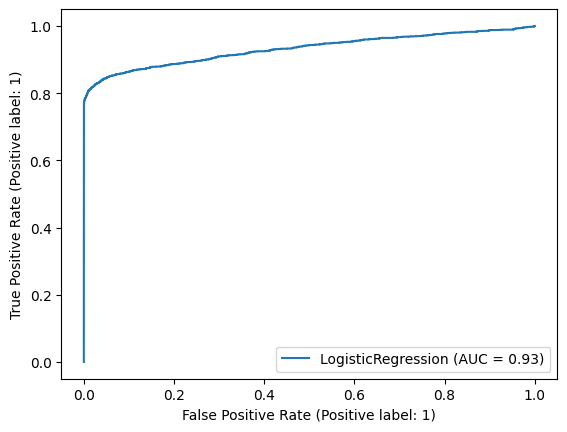

In [81]:
# for training
RocCurveDisplay.from_estimator(best_model,x_train,y_train)

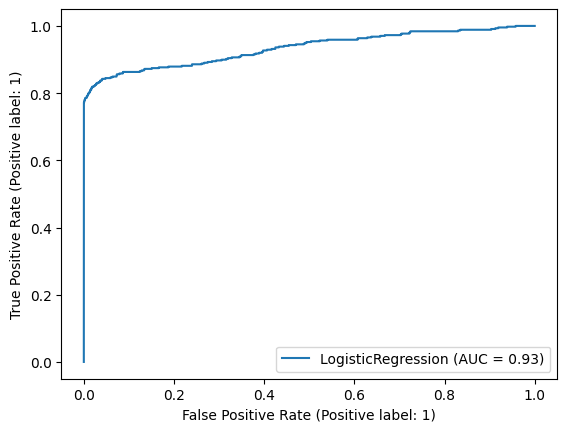

In [82]:
# for testing
RocCurveDisplay.from_estimator(best_model,x_test,y_test)

### Predict out of sample data

In [83]:
x_new=pd.read_csv("test.csv")
x_new.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [84]:
x_new.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [85]:
x_new_pre=pre1.transform(x_new)
x_new_pre.head()

,num_sel__Rotational speed [rpm],num_sel__Torque [Nm],num_sel__Tool wear [min],num_sel__TWF,num_sel__HDF,num_sel__PWF,num_sel__OSF,cat_sel__Type_H,cat_sel__Type_L,cat_sel__Type_M
0,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
1,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
2,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,0.0,1.0,0.0
3,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0
4,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,0.0,0.0,1.0


In [86]:
# predict result
y_pred=best_model.predict(x_new_pre)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [87]:
x_new["Prediction"]=y_pred
x_new.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Prediction
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0


In [88]:
prob=best_model.predict_proba(x_new_pre)[:,1]
prob[:5]

array([0.00154315, 0.00081338, 0.00196709, 0.00263841, 0.0023723 ])

In [89]:
x_new["probability"]=prob

In [90]:
x_new.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Prediction,probability
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0,0.001543
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0,0.000813
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0,0.001967
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,0.002638
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,0.002372


In [91]:
x_new["probability"]=x_new["probability"]*100

In [92]:
x_new.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Prediction,probability
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0,0.154315
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0,0.081338
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0,0.196709
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,0.263841
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,0.237230


In [93]:
x_new[x_new["Prediction"]==1]

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Prediction,probability
17,136446,L52914,L,301.4,311.8,1412,52.3,208,0,0,0,1,0,1,99.260127
209,136638,H36250,H,301.0,310.9,1365,57.4,192,0,0,0,1,0,1,99.493281
223,136652,L51575,L,302.2,310.1,1359,50.4,22,0,1,0,0,0,1,98.798506
397,136826,H33908,H,302.6,310.4,1382,56.5,85,0,1,0,0,0,1,99.625098
405,136834,L47380,L,298.4,308.6,2636,12.8,103,0,0,1,0,0,1,99.879605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90503,226932,H33815,H,302.2,310.1,1339,51.1,12,0,1,0,0,0,1,98.731526
90665,227094,M18884,M,302.1,311.0,1479,60.3,31,0,0,1,0,0,1,99.965458
90679,227108,L51476,L,301.9,310.2,2825,50.6,215,0,0,0,0,0,1,66.397989
90784,227213,L47655,L,297.3,309.1,1380,51.1,220,0,0,0,1,0,1,99.093510


In [94]:
x_new.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Prediction,probability
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0,0.154315
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0,0.081338
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0,0.196709
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,0.263841
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,0.237230


In [95]:
result_file=x_new[["id","Prediction","probability"]]
result_file.head()

,id,Prediction,probability
0,136429,0,0.154315
1,136430,0,0.081338
2,136431,0,0.196709
3,136432,0,0.263841
4,136433,0,0.237230


In [96]:
result_file["Prediction"].value_counts()

Prediction
0    89848
1     1106
Name: count, dtype: int64

<Axes: title={'center': 'count plot failure & non failure machines'}, xlabel='Prediction'>

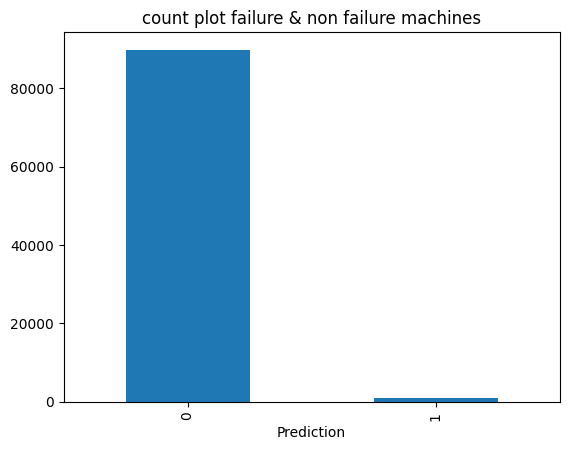

In [97]:
result_file["Prediction"].value_counts().plot(kind="bar",title="count plot failure & non failure machines")

In [98]:
result_file.to_csv("prediction.csv",index=False)